In [23]:
import osgeo
import os
from os.path import join as pjoin
import rioxarray
import xarray as xr
import numpy as np
#import matplotlib as plt
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
from rasterio import features
import pandas as pd
import rasterio

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap
import seaborn as sns


scratch_dir = './data' 

In [29]:
# open the results files
ndsi = rioxarray.open_rasterio('data/resultsNDSI.tif')
ndwi = rioxarray.open_rasterio('data/resultsNDWI.tif')
ndgi = rioxarray.open_rasterio('data/resultsNDGI.tif')

In [15]:
# to reset the dates to the right one every date should be defined minus a sequentual number in range(1,13)
dates = [1991, 1993, 1995, 1997, 1999, 2001, 2003, 2005, 2007, 2009, 2011]

In [43]:
# get correct dates
ndsi.coords['band'] = ndsi.coords['band']+dates
ndwi.coords['band'] = ndwi.coords['band']+dates
ndgi.coords['band'] = ndgi.coords['band']+dates

In [28]:
ndsi

<xarray.DataArray (band: 5, y: 5, x: 5)>
array([[[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]],

       [[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]],

       [[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]],

       [[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]],

       [[1., 1., 1., 2., 2.],
        [1., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]]])
Coordinates:
  * band         (band) int32 1992 1995 1998 2001 2004
  * x            (x) float64 86.44 86.44 86.44 86.44 86.44
  * y            (y) float64 28.2 28.2 28.2 28.2 28.19
    spatial_ref  int32 0
Attributes:
    STATISTICS_APPROXIMATE:    YES
    STATISTICS_MAXIMUM:        2
    STATISTICS_MEAN:           1.636481547513
    STATISTICS_MINIMUM:        1
    STATISTICS_STDDEV:         0.48101225263862
    STATISTICS_VALID_PERCENT:  100
    scale_factor:              1.0
    add_offset:                0.0

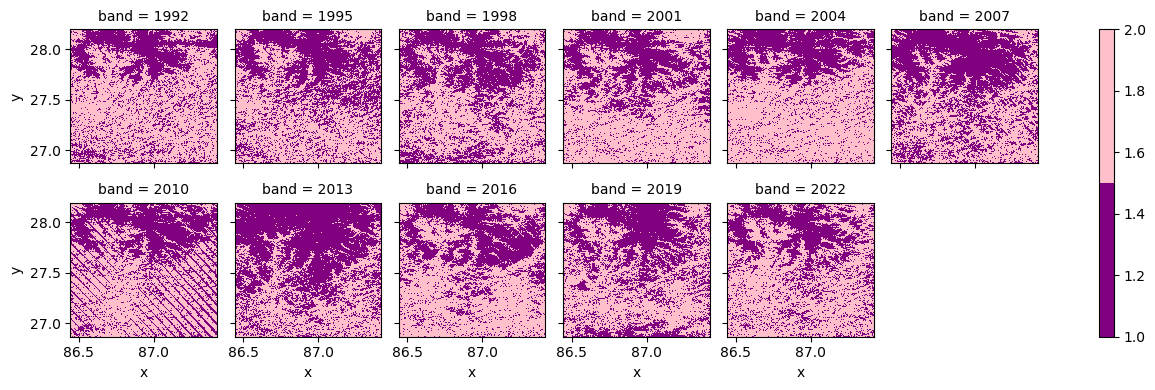

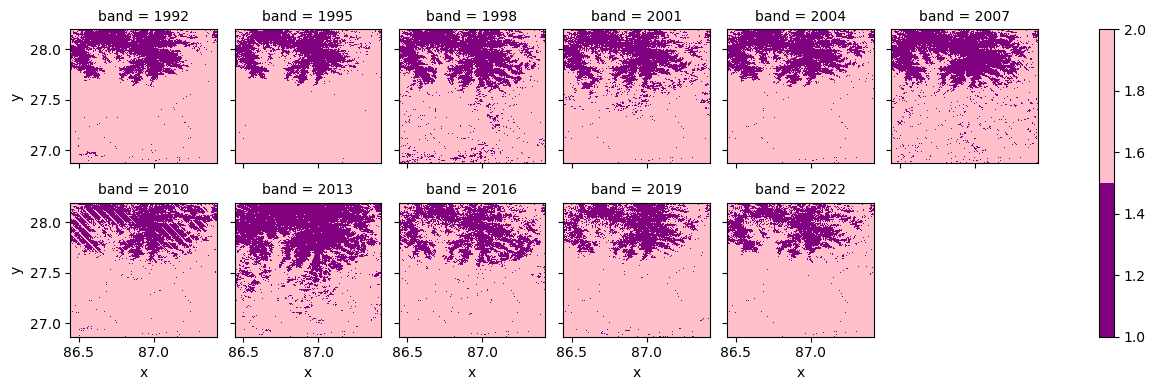

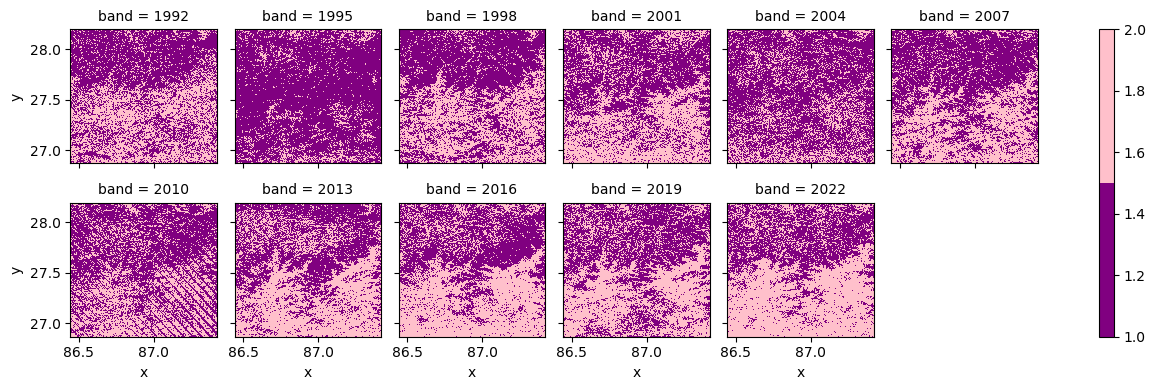

In [44]:
# plot and save plot
cmap = ListedColormap(['purple', 'pink'])

fig = ndsi.plot.imshow(col="band",  col_wrap=6, size=2, cmap = cmap)
fig = fig.fig
fig.savefig('data/ndsitimeseries.png')

fig = ndwi.plot.imshow(col="band",  col_wrap=6, size=2, cmap = cmap)
fig = fig.fig
fig.savefig('data/ndwitimeseries.png')

fig = ndgi.plot.imshow(col="band",  col_wrap=6, size=2, cmap = cmap)
fig = fig.fig
fig.savefig('data/ndgitimeseries.png')